In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


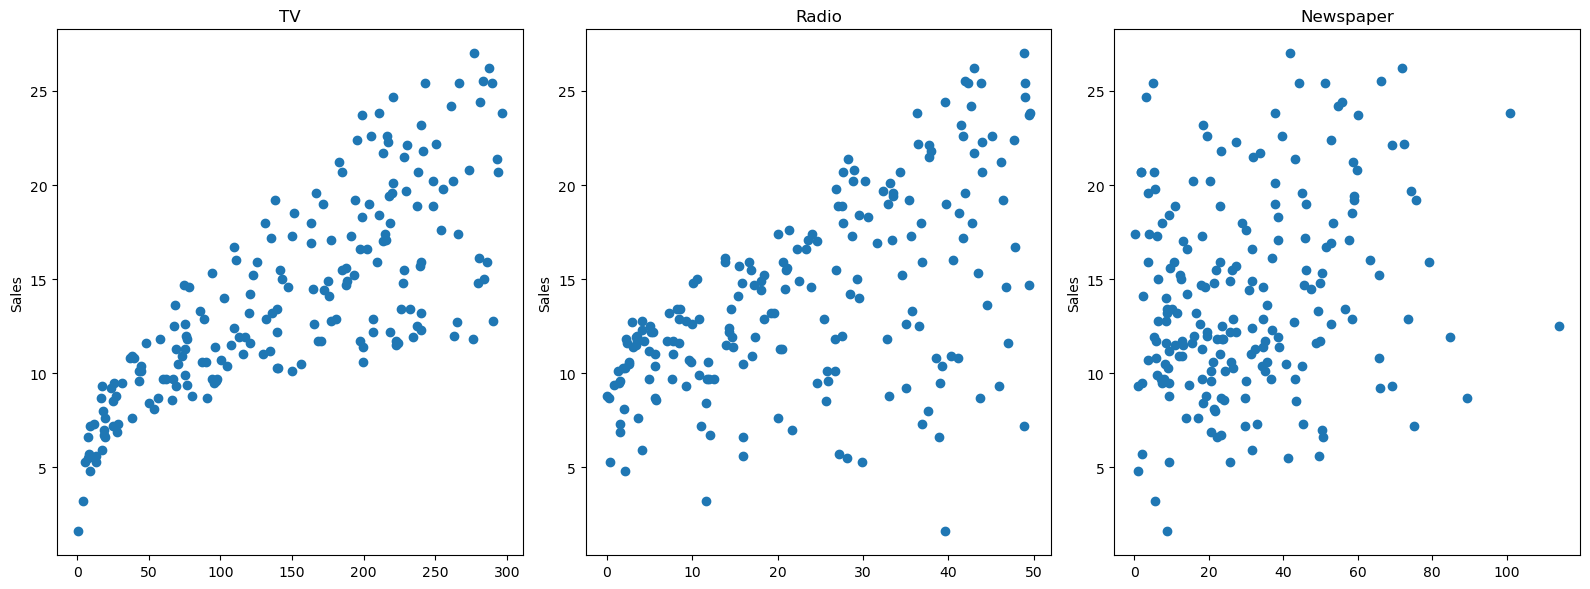

In [10]:
fig, axes = plt.subplots(1,3, figsize=(16, 6))
axes[0].plot(df["TV"], df["sales"], "o")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV")

axes[1].plot(df["radio"], df["sales"], "o")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio")

axes[2].plot(df["newspaper"], df["sales"], "o")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper")
plt.tight_layout();

In [11]:
# independent variable
X = df.drop("sales", axis=1)

In [12]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
# dependent variable
y = df["sales"]

In [14]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
# TRAIN | TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [22]:
len(X_test)

60

In [23]:
# Creating a Model (Estimator)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
# Calculate Performance on Test Set

In [28]:
test_predictions = model.predict(X_test)

In [29]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [32]:
MAE

1.2137457736144803

In [33]:
MSE

2.2987166978863782

In [34]:
RMSE

1.516151937599388

In [35]:
df["sales"].mean()

14.0225

In [37]:
# Residuals - Anscombe's Quartet

In [42]:
quartet = pd.read_csv("anscombes_quartet1.csv")

In [43]:
quartet.head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


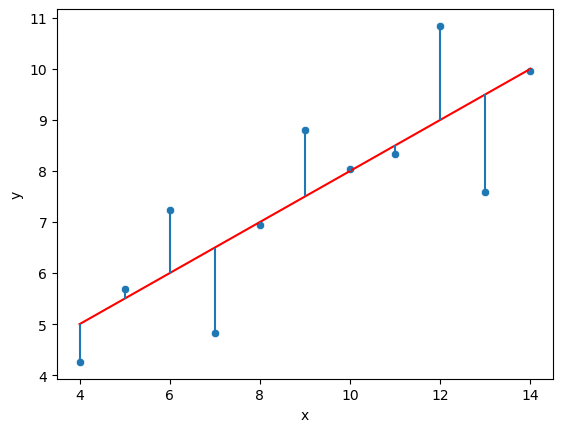

In [45]:
# y = 3.00 + 0.5x
quartet["pred_y"] = 3 + 0.5 * quartet["x"]
quartet["residual"] = quartet["y"] - quartet["pred_y"]

sns.scatterplot(data=quartet, x="x", y="y")
sns.lineplot(data=quartet, x="x", y="pred_y", color="r")
plt.vlines(quartet["x"], quartet["y"], quartet["pred_y"]);

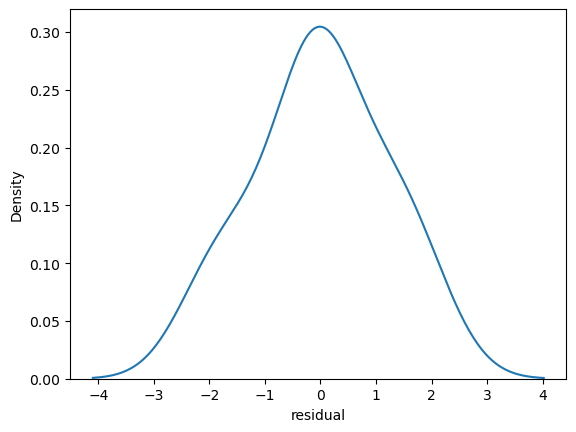

In [48]:
# Distribution of the residuals
sns.kdeplot(quartet["residual"]);

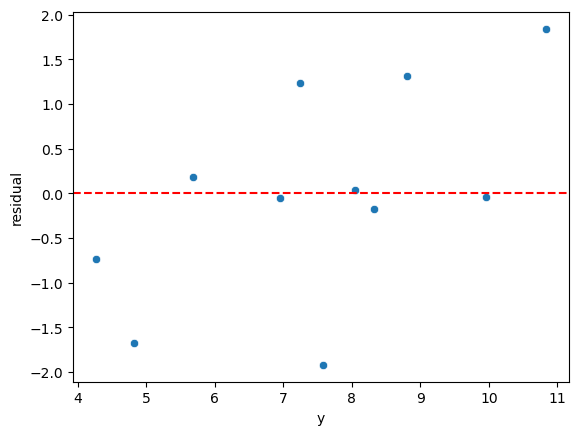

In [51]:
sns.scatterplot(data=quartet, x="y", y="residual")
plt.axhline(y=0, color="r", ls="--");

In [52]:
quartet =pd.read_csv("anscombes_quartet2.csv")

In [53]:
quartet

,x,y
0,10.0,9.14
1,8.0,8.14
2,13.0,8.74
3,9.0,8.77
4,11.0,9.26
5,14.0,8.10
6,6.0,6.13
7,4.0,3.10
8,12.0,9.13
9,7.0,7.26


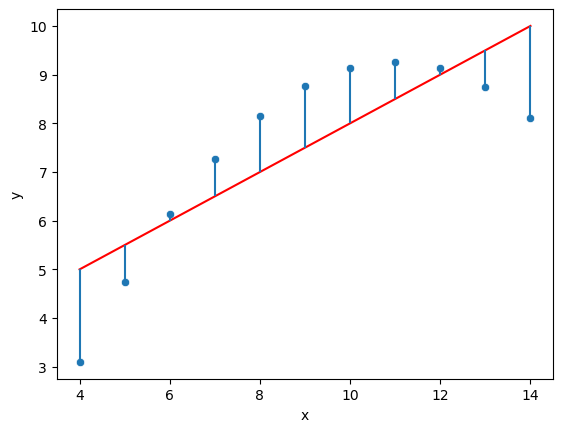

In [58]:
quartet["pred_y"] = 3 + 0.5 * quartet["x"]
quartet["residual"] = quartet["y"] - quartet["pred_y"]

sns.scatterplot(data=quartet, x="x", y="y")
sns.lineplot(data=quartet, x="x", y="pred_y", color="r")
plt.vlines(quartet["x"], quartet["y"], quartet["pred_y"]);

<Axes: xlabel='residual', ylabel='Density'>

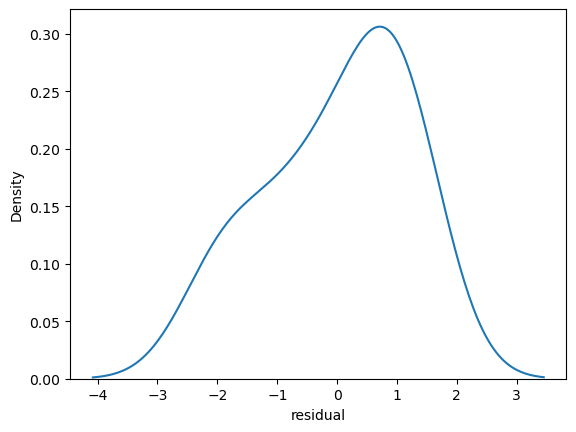

In [55]:
sns.kdeplot(quartet["residual"])

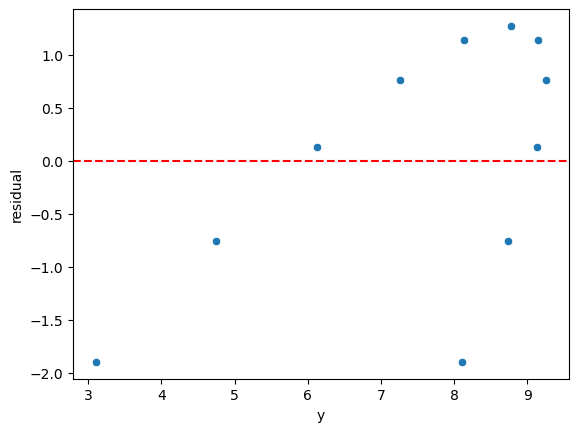

In [56]:
sns.scatterplot(data=quartet, x="y", y="residual")
plt.axhline(y=0, color="r", ls="--");

In [59]:
quartet = pd.read_csv("anscombes_quartet4.csv")

In [60]:
quartet.head()

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47


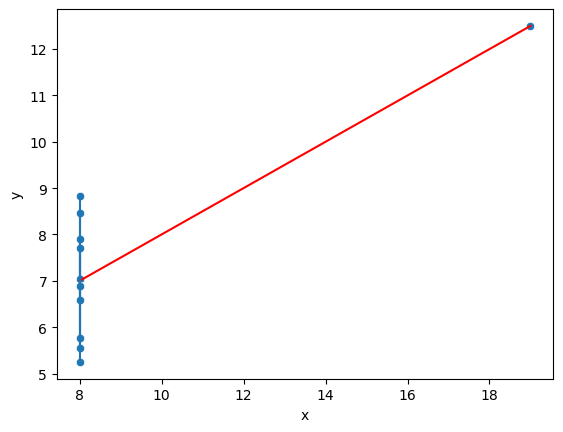

In [61]:
quartet["pred_y"] = 3 + 0.5 * quartet["x"]
quartet["residual"] = quartet["y"] - quartet["pred_y"]

sns.scatterplot(data=quartet, x="x", y="y")
sns.lineplot(data=quartet, x="x", y="pred_y", color="r")
plt.vlines(quartet["x"], quartet["y"], quartet["pred_y"]);

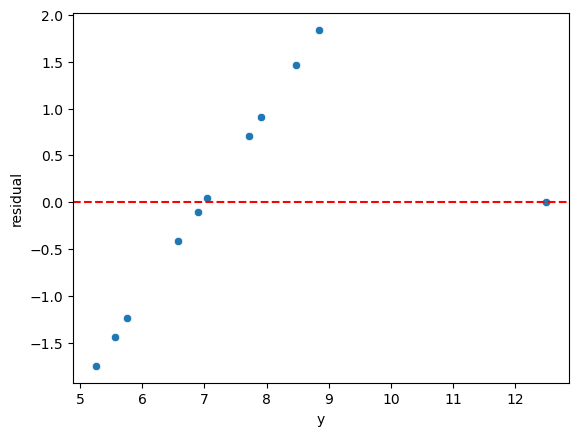

In [64]:
sns.scatterplot(data=quartet, x="y", y="residual")
plt.axhline(y=0, color="r", ls="--");

In [65]:
# Plotting Residuals

In [66]:
test_predictions = model.predict(X_test)

In [67]:
test_residuals = y_test - test_predictions

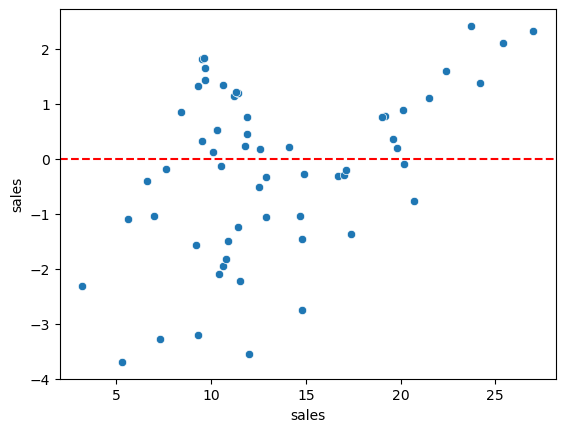

In [71]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color="r", ls="--")

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


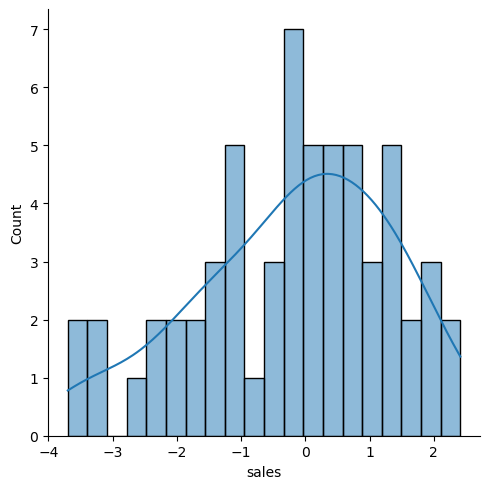

In [72]:
sns.displot(test_residuals, kde=True, bins=20)

In [73]:
 # More on normality check

In [74]:
import scipy as sp

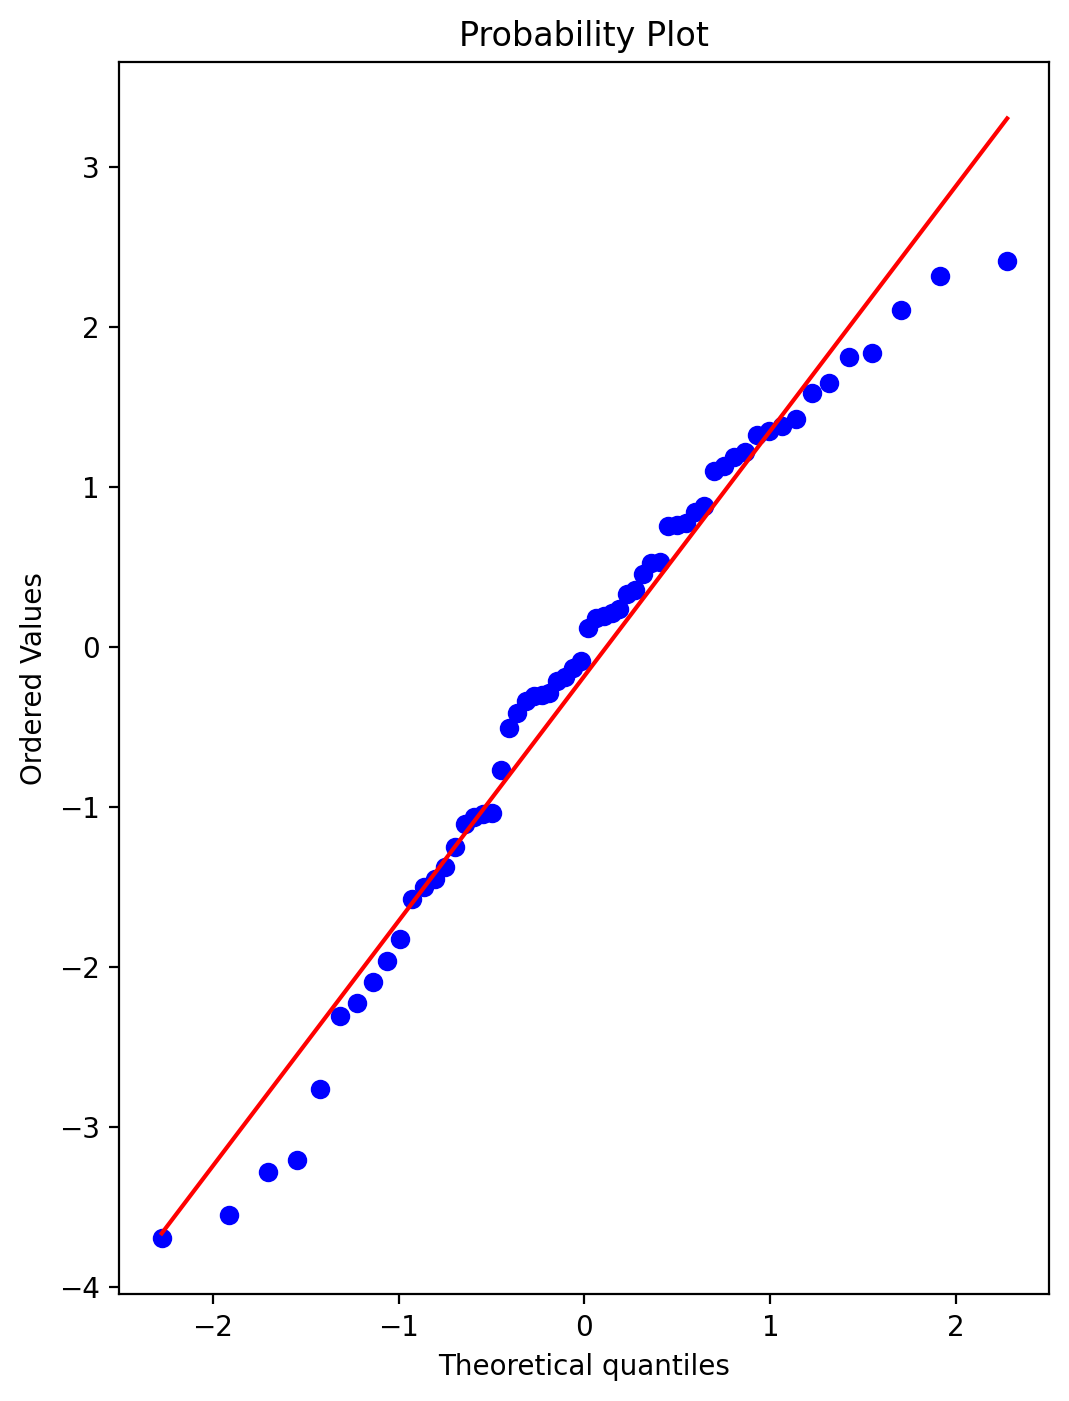

In [75]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=200)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [76]:
# Retraining the Model

In [77]:
final_model = LinearRegression()

In [78]:
final_model.fit(X, y)

LinearRegression()

In [79]:
# Use the final model to predict all the points

In [80]:
y_hat = final_model.predict(X)

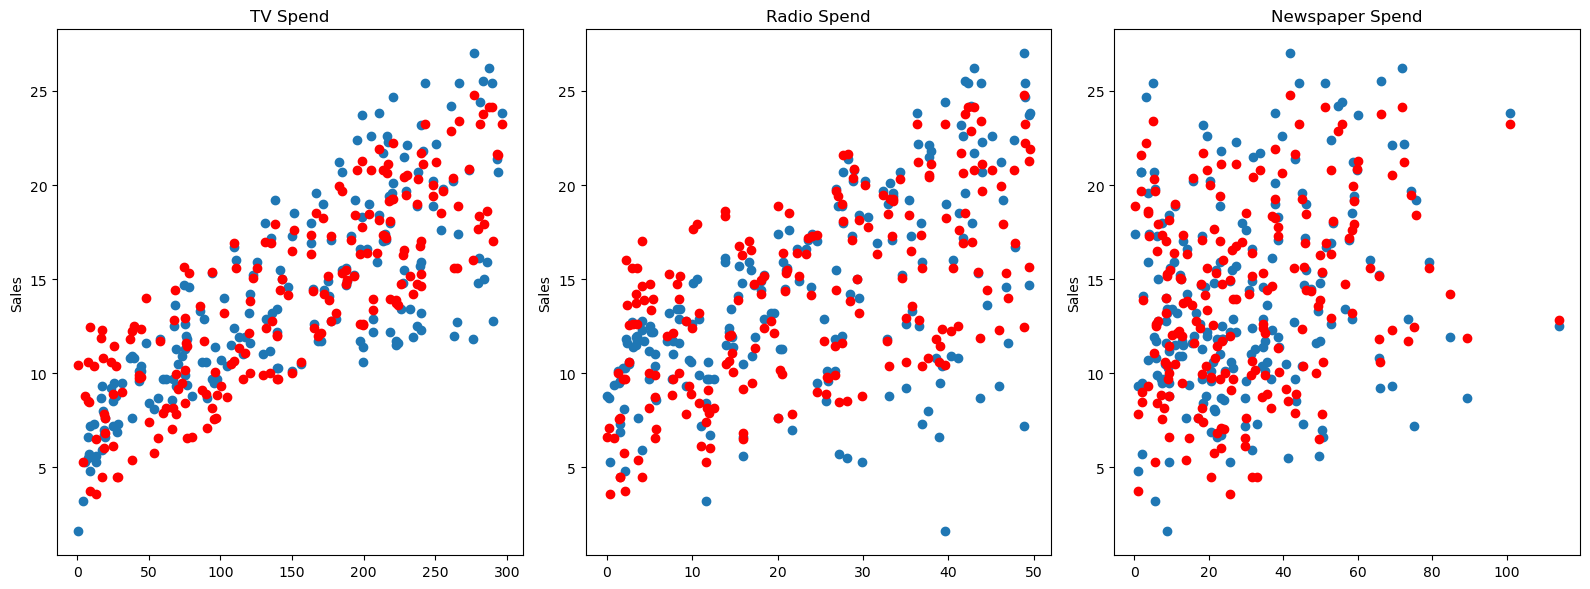

In [81]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat,'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat,'o', color='red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [82]:
residuals = y - y_hat

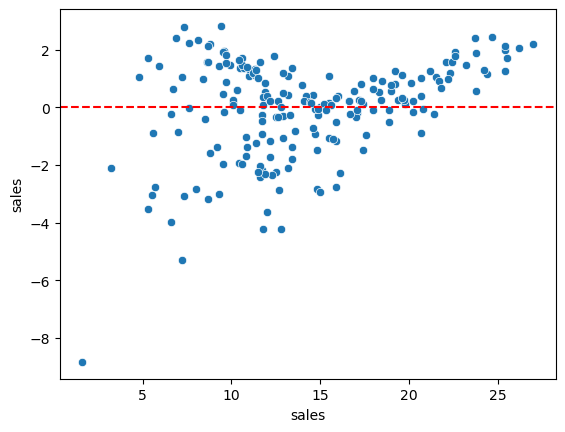

In [85]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color="r", ls="--");

In [86]:
# Coefficients

In [87]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [88]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [89]:
# Use the final model for prediction

In [96]:
campaign = [[200, 25, 15]]

In [97]:
final_model.predict(campaign)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.78950649])

In [1]:
# Model Deployment

In [99]:
from joblib import dump, load

In [100]:
dump(final_model, "sales_model.joblib")

['sales_model.joblib']

In [101]:
my_model = load("sales_model.joblib")

In [102]:
my_model.predict(campaign)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.78950649])